In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 16:09:39.167725: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:09:39.247848: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:09:39.249423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 16:09:40.381569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 1)       10        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 1)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 2)         20        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 2)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         76        
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 4)         0

In [6]:
trainer.training_loop()

2023/08/13 16:09:43 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 16:09:43 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/80
56/56 - 6s - loss: 0.6501 - recall: 0.9757 - binary_accuracy: 0.6110 - precision: 0.6103 - false_negatives: 13.0000 - false_positives: 334.0000 - val_loss: 0.6078 - val_recall: 0.9701 - val_binary_accuracy: 0.6351 - val_precision: 0.6280 - val_false_negatives: 4.0000 - val_false_positives: 77.0000 - 6s/epoch - 103ms/step
Epoch 2/80


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 3s - loss: 0.5680 - recall: 0.8041 - binary_accuracy: 0.7130 - precision: 0.7405 - false_negatives: 105.0000 - false_positives: 151.0000 - val_loss: 0.5624 - val_recall: 0.9030 - val_binary_accuracy: 0.7342 - val_precision: 0.7246 - val_false_negatives: 13.0000 - val_false_positives: 46.0000 - 3s/epoch - 59ms/step
Epoch 3/80
56/56 - 3s - loss: 0.5214 - recall: 0.7985 - binary_accuracy: 0.7253 - precision: 0.7575 - false_negatives: 108.0000 - false_positives: 137.0000 - val_loss: 0.5288 - val_recall: 0.8060 - val_binary_accuracy: 0.7613 - val_precision: 0.8000 - val_false_negatives: 26.0000 - val_false_positives: 27.0000 - 3s/epoch - 62ms/step
Epoch 4/80
56/56 - 5s - loss: 0.5042 - recall: 0.7948 - binary_accuracy: 0.7545 - precision: 0.7963 - false_negatives: 110.0000 - false_positives: 109.0000 - val_loss: 0.5539 - val_recall: 0.6493 - val_binary_accuracy: 0.7027 - val_precision: 0.8208 - val_false_negatives: 47.0000 - val_false_positives: 19.0000 - 5s/epoch - 81ms/step
Epoch 

2023/08/13 16:15:11 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 16:15:11 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpov2noj8i/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpov2noj8i/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 3s 46ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9458955223880597, 'fp_Train_acc': 0.9641255605381166, 'fp_Train_precision': 0.9941176470588236}
Confusion matrix Train 
 [[353   3]
 [ 29 507]]
56/56 [==============================] - 2s 32ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (291).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (325).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (39).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (244).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (283).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (289).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (322).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (363).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (376).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (38).jpe

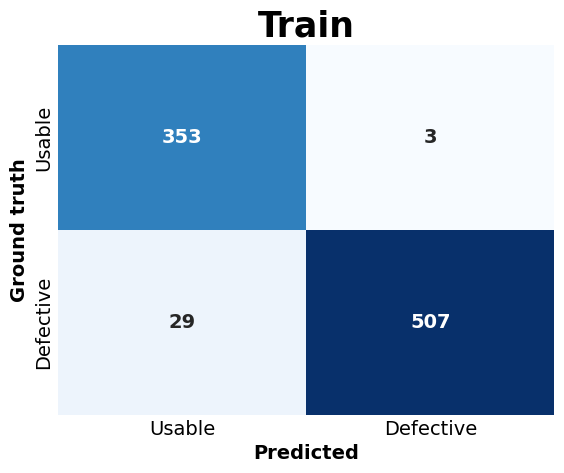

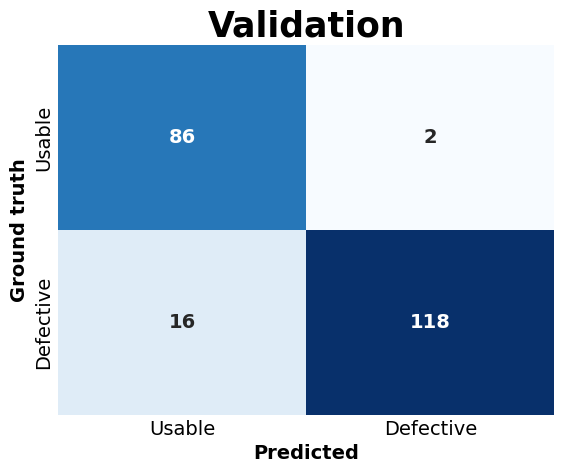

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpsplk19_g/assets


INFO:tensorflow:Assets written to: /tmp/tmpsplk19_g/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 16:15:32.927265: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 16:15:32.927300: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 16:15:32.927806: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpsplk19_g
2023-08-13 16:15:32.932220: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 16:15:32.932260: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpsplk19_g
2023-08-13 16:15:32.942055: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00@\r\x00\x00P\r\x00\x00l"\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xfe\xf1\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00F\xf3\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\\\x0c\x00\x00T\x0c\x00\x00<\x0c\x00\x00 \x0c\x00\x00\x10\x08\x00\x00\xc0\x07\x00\x000\x03\x00\x00\x00\x03\x00\x00\xd0\x01\x00\x00\xb0\x01\x00\x00X\x01\x00\x00@\x0

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 2s 34ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.0034484542, 'qt_std': 0.019343495, 'qt_abs_mean': 0.009576025, 'qt_abs_std': 0.017156992}


{'diff': array([ 1.11303777e-02, -9.06893611e-03, -7.52721727e-03,  6.14449382e-04,
         1.22819841e-03, -7.81929411e-05,  1.43289659e-03, -1.31029636e-02,
        -1.27221756e-02, -1.59312598e-03,  6.46547414e-04, -7.96565670e-04,
         4.94455453e-04, -8.15740973e-03, -1.97731977e-04, -6.99825585e-04,
        -4.76267003e-03, -2.41398811e-05, -4.89801168e-05, -1.40266120e-03,
        -1.18123740e-03, -1.01486593e-03, -5.19260764e-03, -5.46138734e-04,
         5.70601784e-04,  7.51068071e-03, -1.32125616e-03, -4.27020192e-02,
         4.08090800e-02, -3.12906504e-03, -3.80769372e-04, -2.22128630e-03,
        -3.53041105e-05,  2.16411054e-03,  1.61329657e-02, -3.48676741e-03,
        -9.62995924e-04,  7.35442340e-03, -9.39520076e-04,  6.62095845e-04,
        -3.43176350e-03, -6.17941841e-05, -3.57544050e-04,  2.24221032e-04,
        -4.55175526e-03,  1.25962612e-03, -3.75214545e-03,  4.23648208e-03,
         2.13171691e-02, -1.80744529e-02,  2.95080803e-03, -3.20144929e-03,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9477611940298507, 'qt_Train_acc': 0.9641255605381166, 'qt_Train_precision': 0.9921875}
Confusion matrix Train 
 [[352   4]
 [ 28 508]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (291).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (325).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (39).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (99).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (244).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (283).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (289).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (322).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (363).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (376).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (38).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (

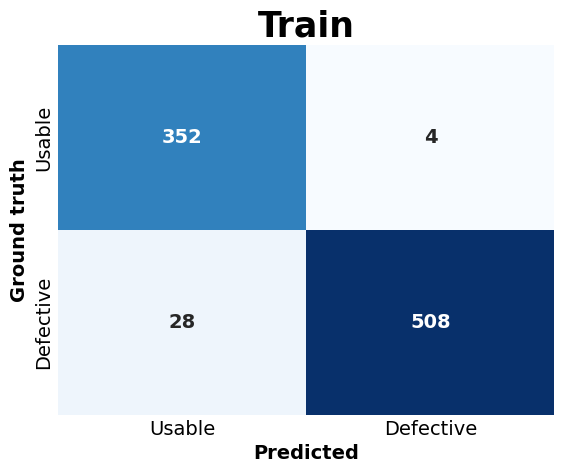

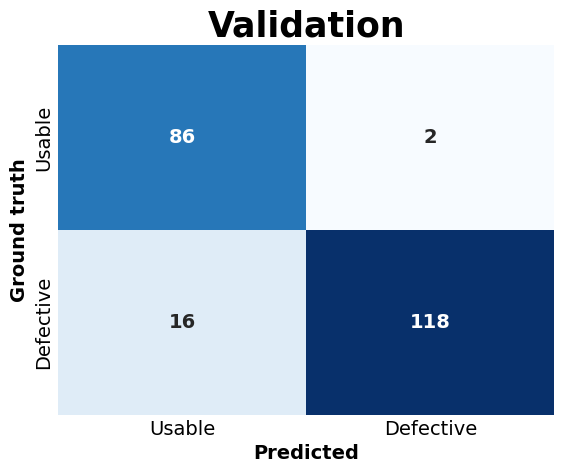

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 1s 36ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9181818181818182, 'fp_Test_acc': 0.9344262295081968, 'fp_Test_precision': 0.9711538461538461}
Confusion matrix Test 
 [[ 70   3]
 [  9 101]]
12/12 [==============================] - 0s 35ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (453).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (503).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (671).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (673).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (743).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (749).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (761).jpeg', '../dataset

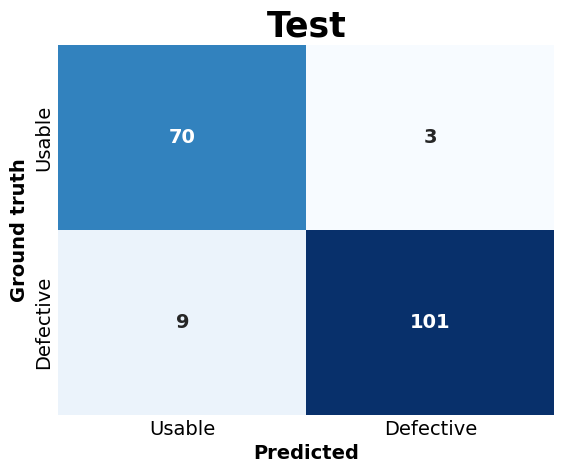

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9181818181818182, 'qt_Test_acc': 0.9398907103825137, 'qt_Test_precision': 0.9805825242718447}
Confusion matrix Test 
 [[ 71   2]
 [  9 101]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (453).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (671).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (673).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (743).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (749).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (761).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (762).jpeg']


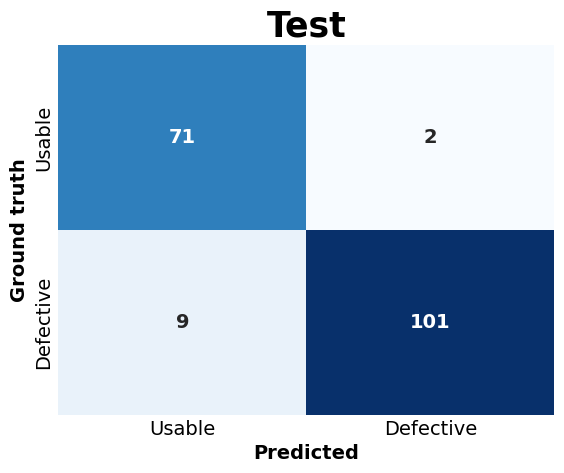

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()